In [1]:
import sys

class UnbufferedStream:
    def __init__(self, stream):
        self._stream = stream
    def write(self, data):
        self._stream.write(data)
        self._stream.flush()
    def writelines(self, lines):
        self._stream.writelines(lines)
        self._stream.flush()
    def __getattr__(self, name):
        return getattr(self._stream, name)

sys.stdout = UnbufferedStream(sys.stdout)
sys.stderr = UnbufferedStream(sys.stderr)

In [2]:
from testTools import primality_complexity, graph_complexity
from smooth import is_prime
import time
import json

In [3]:
t1 = time.time()
p = is_prime("999983")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("999999999989")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("9223372036854775783")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("170141183460469231731687303715884105727")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("115792089237316195423570985008687907853269984665640564039457584007913129639747")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747492783")
t2 = time.time()
print(t2-t1, p)

8.392333984375e-05 True
9.393692016601562e-05 True
4.7206878662109375e-05 True
0.05666494369506836 True
0.5643088817596436 True
3.6077239513397217 True


In [6]:
with open("large_prime_dataset.json", 'r') as f:
    raw = json.load(f)
data =  {int(k): v for k, v in raw.items()}

primes_64_bit = [(2**n - k) for n in range(8, 64) for k in data[n]]
primes_256_bit = [(2**n - k) for n in range(8, 257) for k in data[n]]
primes_400_bit = [(2**n - k) for n in range(8, 401) for k in data[n]]

print(len(primes_64_bit), max(primes_64_bit))
print(len(primes_256_bit), max(primes_256_bit))
print(len(primes_400_bit), max(primes_400_bit))

data_64 = primes_64_bit
data_256 = [primes_256_bit[i] for i in range(0, len(primes_256_bit), 4)]
data_400 = [primes_400_bit[i] for i in range(0, len(primes_400_bit), 5)]
print(len(data_64), len(data_256), len(data_400))

560 9223372036854775783
2490 115792089237316195423570985008687907853269984665640564039457584007913129639747
3930 2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747492783
560 623 786


In [7]:
times_64 = primality_complexity(lambda n : is_prime(n), 0, data_64)
times_256 = primality_complexity(lambda n : is_prime(n), 0, data_256)
times_400 = primality_complexity(lambda n : is_prime(n), 0, data_400)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

Finished concat.
Graphing...
197 9223372036854775783 2.220446049250313e-16 4.4822692871315795e-05


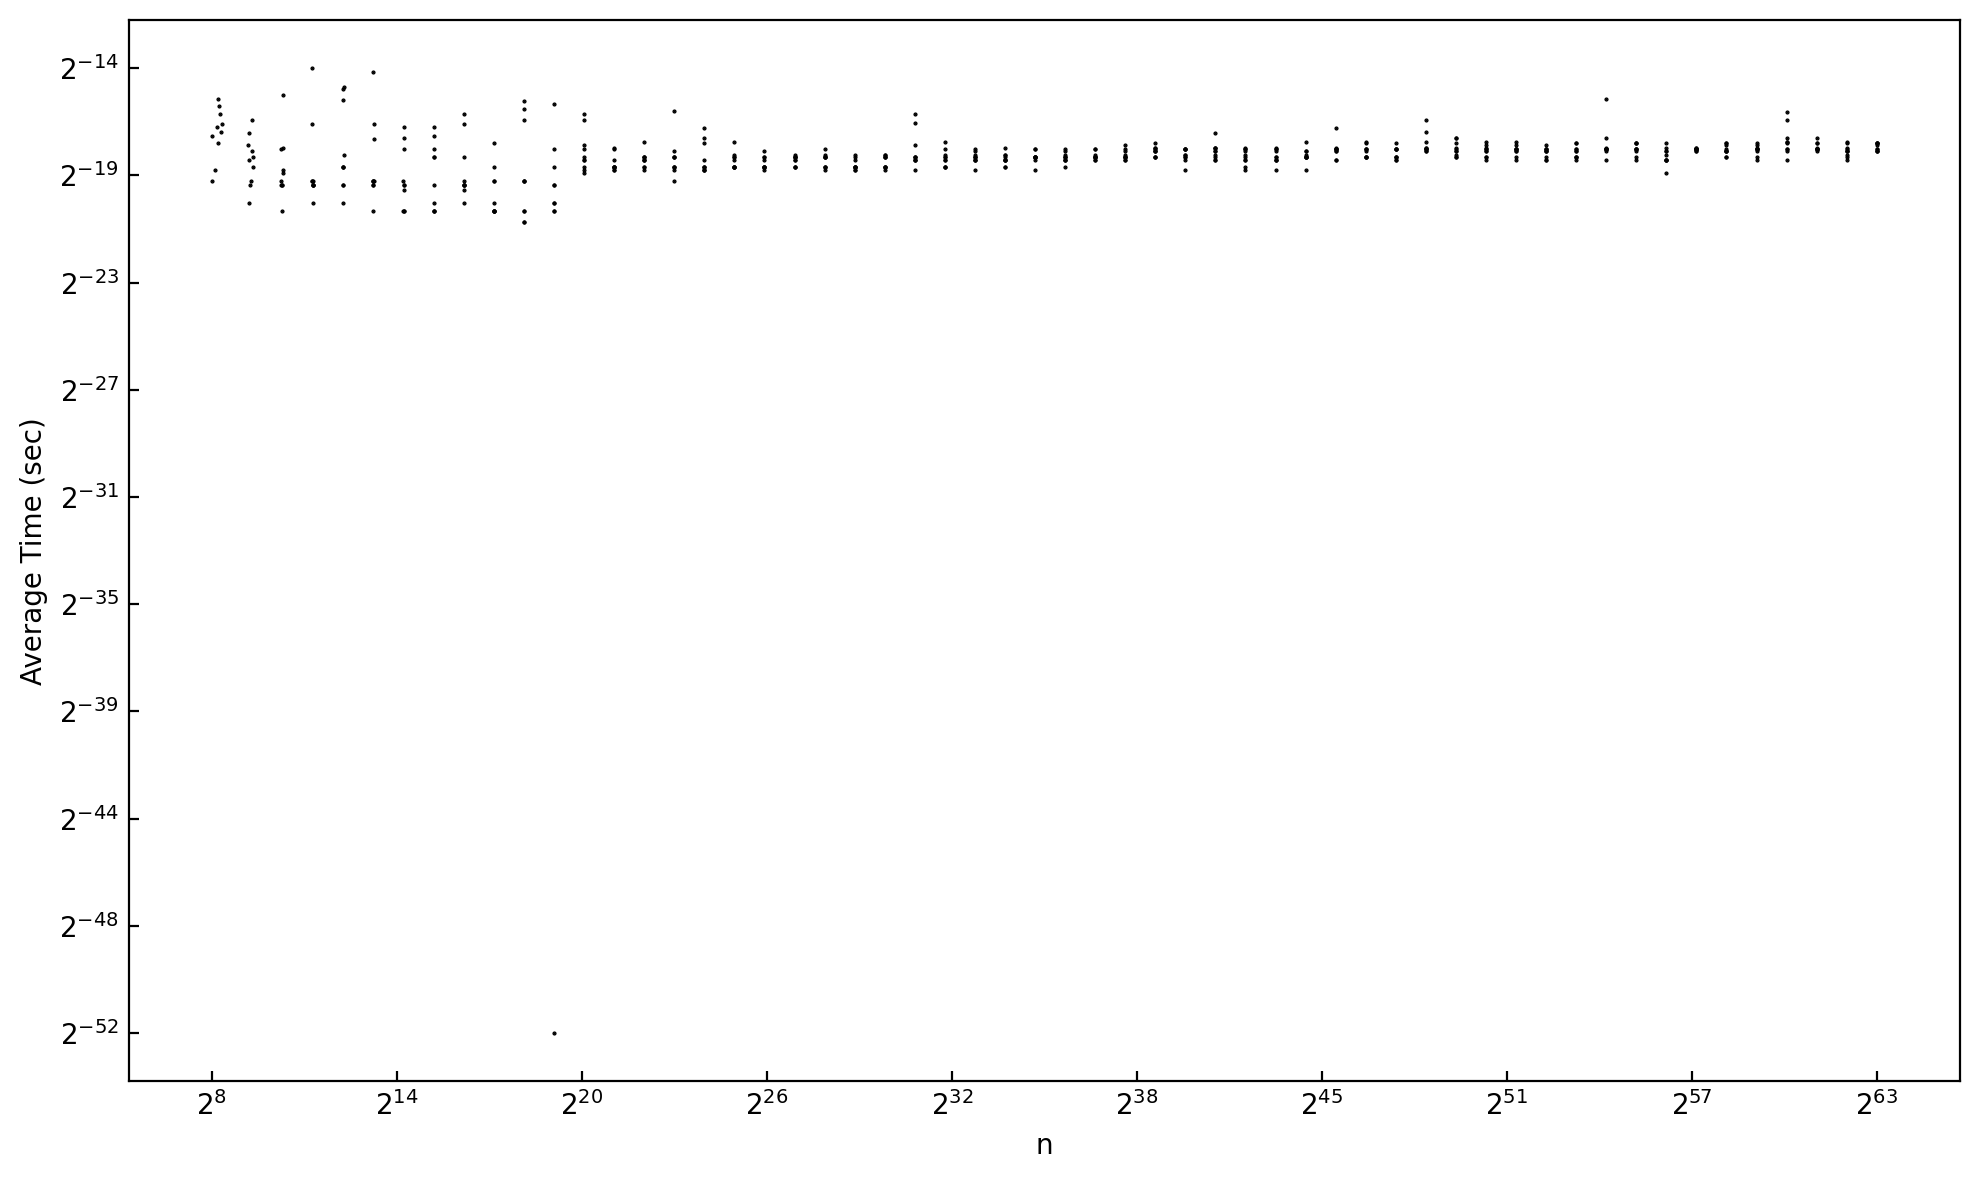

In [8]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_64[0]], times_64[1], dpts=560, log=True)

Finished concat.
Graphing...
199 115792089237316195423570985008687907853269984665640564039457584007913129639747 7.152557375267321e-07 0.5932731628417971


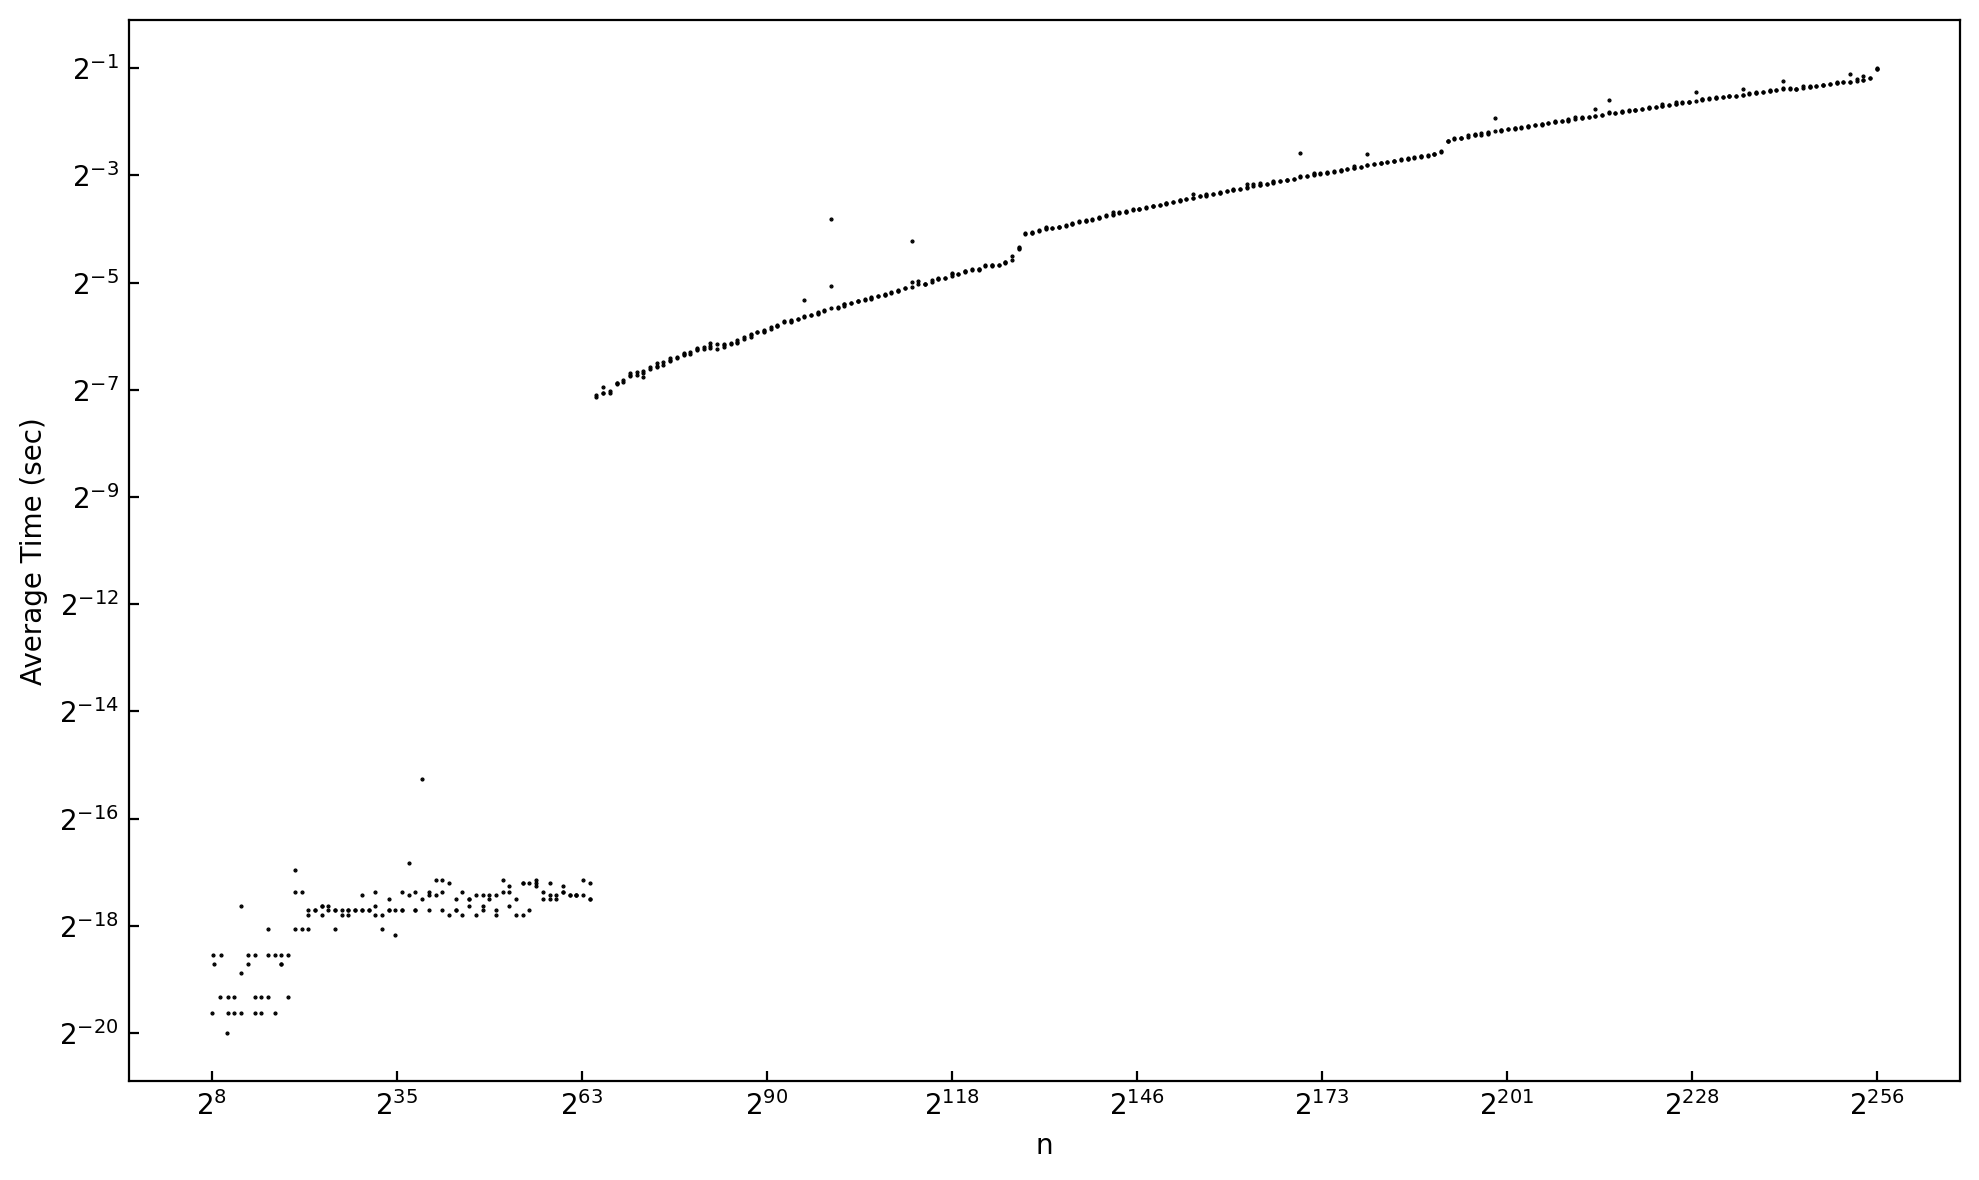

In [10]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_256[0]], times_256[1], dpts=623, log=True)

Finished concat.
Graphing...
227 2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747492783 7.152557375267321e-07 3.7521910667419434


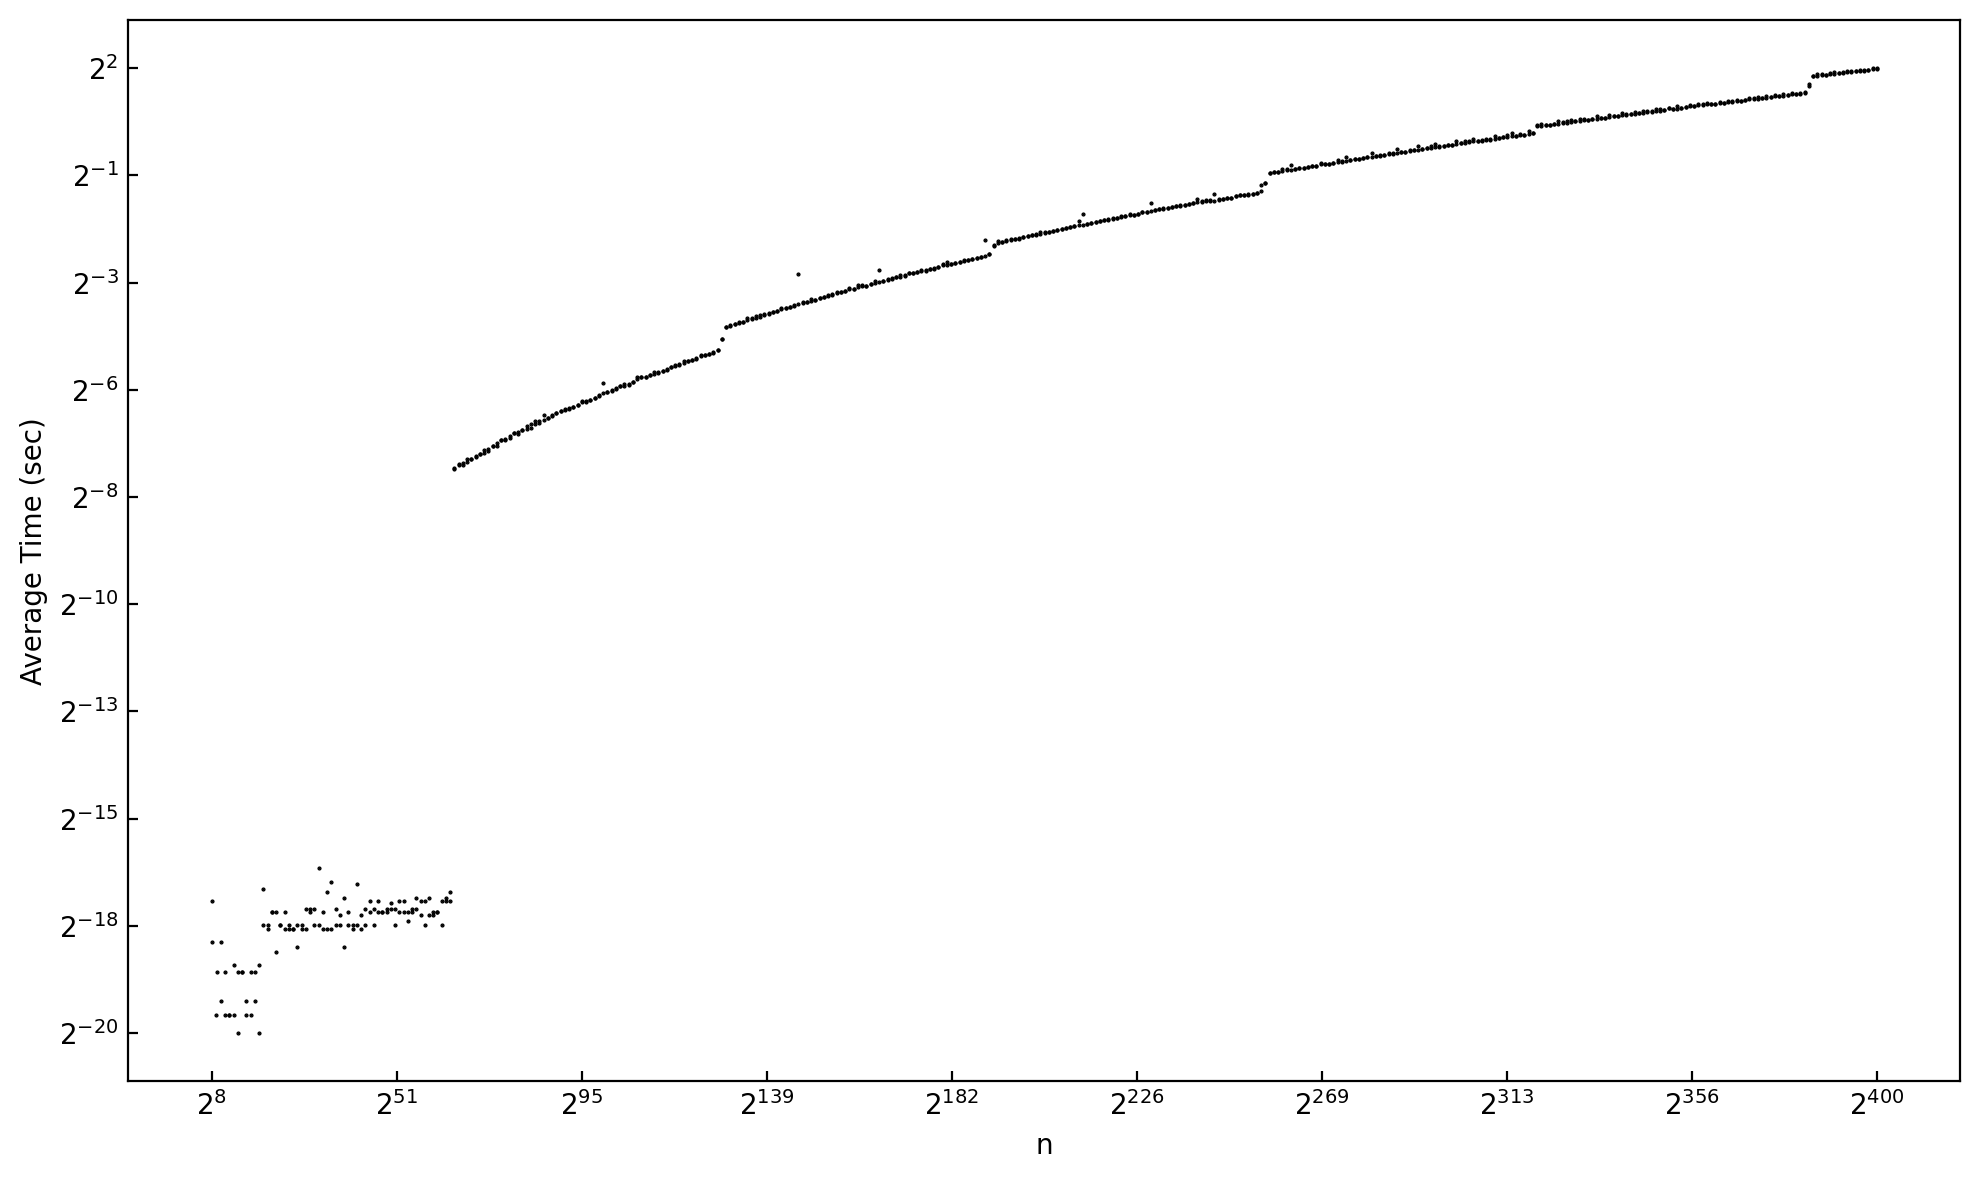

In [11]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_400[0]], times_400[1], dpts=786, log=True)